# Multi-Class Classification

In [1]:
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

In [2]:
X_train = open_images("./data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("./data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("./data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("./data/fashion/t10k-labels-idx1-ubyte.gz")


In [3]:
from keras.utils import to_categorical
print(to_categorical(y_test))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(X_train.reshape(-1, 784), y_train, epochs=10, batch_size=1000)


Epoch 1/10
60000/60000 [==============================] - 0s 7us/step - loss: 2.1952 - accuracy: 0.1454
Epoch 2/10
60000/60000 [==============================] - 0s 6us/step - loss: 2.0244 - accuracy: 0.2988
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.8228 - accuracy: 0.5295
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.6122 - accuracy: 0.6233
Epoch 5/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.4380 - accuracy: 0.6625
Epoch 6/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.2975 - accuracy: 0.6846
Epoch 7/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.1843 - accuracy: 0.7009
Epoch 8/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.0916 - accuracy: 0.7181
Epoch 9/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.0143 - accuracy: 0.7324
Epoch 10/10
60000/60000 [==============================] - 0s 7

In [12]:
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 0s 17us/step


[0.9419819415092469, 0.7336000204086304]

## Confusion Matrix

In [14]:
model.predict(X_test.reshape(-1,784))[0]

array([0.01040316, 0.01048201, 0.00986335, 0.00595862, 0.01235136,
       0.08783448, 0.00723293, 0.09321421, 0.05383074, 0.36756378],
      dtype=float32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


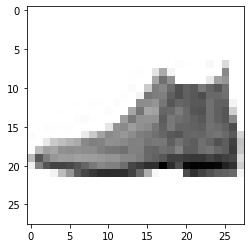

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

print(y_test[0])
plt.imshow(X_test[0], cmap="gray_r")
plt.show()

In [16]:
import numpy as np

In [17]:
pred = model.predict(X_test.reshape(-1,784))

In [18]:
np.argmax(pred[0])

9

In [19]:
all_argmax = np.argmax(pred, axis=1)

In [20]:
all_argmax.shape

(10000,)

In [30]:
#from pandas_ml import ConfusionMatrix

# ConfusionMatix(np.argmax(y_test, axis=1), all_argmax)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(np.argmax(y_test, axis=1), all_argmax)

array([[818,   5,  16,  78,  11,   0,  48,   0,  24,   0],
       [ 12, 908,  16,  49,  10,   0,   4,   0,   1,   0],
       [ 21,   2, 657,  13, 200,   0,  83,   0,  23,   1],
       [ 70,  10,  12, 820,  36,   0,  44,   0,   8,   0],
       [  6,   5, 259,  63, 604,   0,  53,   0,   9,   1],
       [  0,   1,   1,   3,   0, 633,   1, 214,  23, 124],
       [257,   2, 270,  54, 188,   1, 189,   1,  38,   0],
       [  0,   0,   0,   0,   0,  43,   0, 848,   0, 109],
       [  4,   1,  10,  14,   2,  12,  20,   8, 923,   6],
       [  0,   0,   0,   1,   0,  11,   0,  48,   4, 936]], dtype=int64)

## Classificaiton with Softmax 

In [34]:
import numpy as np
np.set_printoptions(suppress=True)

In [35]:
def softmax(w):
    e = np.exp(np.array(w))
    dist = e / np.sum(e)
    return dist

def sigmoid(x):
    return 1/(1+np.exp(-np.array(x)))

In [36]:
test_array = [10, -2, 0, 0, 0, 0]

In [39]:
sigmoid(test_array), "", np.sum(sigmoid(test_array))

(array([0.9999546 , 0.11920292, 0.5       , 0.5       , 0.5       ,
        0.5       ]), '', 3.1191575241534153)

In [40]:
softmax(test_array), "", np.sum(softmax(test_array))

(array([0.99981229, 0.00000614, 0.00004539, 0.00004539, 0.00004539,
        0.00004539]), '', 0.9999999999999999)

## Classification with Softmax

In [41]:
X_train = open_images("./data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("./data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("./data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("./data/fashion/t10k-labels-idx1-ubyte.gz")


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [44]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
model.fit(X_train.reshape(-1, 784), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 0s 7us/step - loss: 1.7362 - accuracy: 0.4580
Epoch 2/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.2399 - accuracy: 0.6694
Epoch 3/10
60000/60000 [==============================] - 0s 6us/step - loss: 1.0665 - accuracy: 0.7147
Epoch 4/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.9564 - accuracy: 0.7378
Epoch 5/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.8810 - accuracy: 0.7529
Epoch 6/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.8266 - accuracy: 0.7628
Epoch 7/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.7826 - accuracy: 0.7720
Epoch 8/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.7472 - accuracy: 0.7787
Epoch 9/10
60000/60000 [==============================] - 0s 6us/step - loss: 0.7176 - accuracy: 0.7858
Epoch 10/10
60000/60000 [==============================] - 0s 6u